In [4]:
pip install pandas


  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/e1/0c/ad295fd74bfac85358fd579e271cded3ac969de81f62dd0142c426b9da91/pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 490.2 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for numpy>=1.26.0 from https://files.pythonhosted.org/packages/54/4a/765b4607f0fecbb239638d610d04ec0a0ded9b4951c56dc68cef79026abf/numpy-2.1.3-cp312-cp312-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/11/c3/005fcca25ce078d2cc29fd559379817424e94885510568bc1bc53d7d5846/pytz-2024.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/a6/ab/7e5f53c3b9d14972843a647d8d7a853969a58aecc7559cb3267302c94774/tzdata-2024.2-py2.py3-no

In [9]:
#Step 1: Data Acquisition
import pandas as pd

# Use the full path to read the dataset
data = pd.read_csv('/Users/lakshaydahiya/Downloads/diabetes.csv')

# Check the first few rows to ensure it's loaded correctly
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Step 2: Methodology and Objective
#We will focus on using machine learning to predict diabetes. We will perform preprocessing, split the data into training and testing sets, use several models, and evaluate them using various metrics.

In [11]:
#Step 3: Data Preprocessing
# Check for missing values
data.isnull().sum()

# If there are missing values, you can choose to fill or drop them.
# For example, fill missing values with the mean for numerical columns
data.fillna(data.mean(), inplace=True)

# Display the cleaned data
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
#Feature and Target Split
#Assuming the target column is "Outcome" and the rest are features:

# Split the data into features (X) and target (y)
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target (Outcome column)

In [14]:
pip install imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/d8/0d/c3bfccc5d460eec8ff56889802aa88f5d07280d5282b307a74558e6edc44/imbalanced_learn-0.12.4-py3-none-any.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/c8/53/35b4d41f5fd42f5781dbd0dd6c05d35ba8aa75c84ecddc7d44756cd8da2e/scipy-1.14.1-cp312-cp312-macosx_12_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 603.9 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for scikit-learn>=1.0.2 from https://files.pythonhosted.org/packages/54/1a/7deb52fa23aebb855431ad659b3c6a2e1709ece582cb3a63d66905e735fe/scikit_learn-1.5.2-cp312-cp312-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information 

In [16]:
#Handling Class Imbalance (Using SMOTE)
#If the dataset is imbalanced (e.g., more non-diabetic than diabetic), we will use SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes.

# Import necessary libraries for SMOTE
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify the new class distribution
y_resampled.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

In [17]:
#Step 4: Splitting Data for Training and Testing
#We will split the data into training and testing sets (80% for training and 20% for testing).

# Import necessary library for splitting data
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Display the shape of the split data
print("Training data:", X_train.shape)
print("Test data:", X_test.shape)

Training data: (800, 8)
Test data: (200, 8)


In [18]:
#Step 5: Scaling the Features
#It is important to scale the features, especially when using models like Logistic Regression or SVM that are sensitive to feature scaling.

# Import StandardScaler to scale features
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Step 6: Machine Learning Model Training

In [19]:
#Model 1: Random Forest Classifier

# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

In [ ]:
#Model 2: Logistic Regression

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Predict on the test data
y_pred_logreg = logreg_model.predict(X_test)

In [20]:
#Model 3: Support Vector Machine (SVM)

# Import SVC (Support Vector Classification)
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm_model.predict(X_test)

In [22]:
#Step 7: Model Evaluation
#Now we’ll evaluate the models using multiple performance metrics such as accuracy, precision, recall, F1-score, confusion matrix, and ROC-AUC score.

#Evaluation Metrics

# Import necessary evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Function to print evaluation metrics
def evaluate_model(y_test, y_pred, model_name):
    print(f"Evaluation for {model_name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print()
    
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Now you can call the evaluate_model function
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")

# Evaluate SVM
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")

Evaluation for Logistic Regression:
Accuracy: 0.755
Precision: 0.75
Recall: 0.7722772277227723
F1-Score: 0.7609756097560976
ROC-AUC Score: 0.7548254825482548
Confusion Matrix:
 [[73 26]
 [23 78]]

Evaluation for Random Forest:
Accuracy: 0.83
Precision: 0.7964601769911505
Recall: 0.8910891089108911
F1-Score: 0.8411214953271028
ROC-AUC Score: 0.8293829382938295
Confusion Matrix:
 [[76 23]
 [11 90]]

Evaluation for Logistic Regression:
Accuracy: 0.755
Precision: 0.75
Recall: 0.7722772277227723
F1-Score: 0.7609756097560976
ROC-AUC Score: 0.7548254825482548
Confusion Matrix:
 [[73 26]
 [23 78]]

Evaluation for Support Vector Machine:
Accuracy: 0.75
Precision: 0.7297297297297297
Recall: 0.801980198019802
F1-Score: 0.7641509433962265
ROC-AUC Score: 0.7494749474947495
Confusion Matrix:
 [[69 30]
 [20 81]]



In [25]:
pip install matplotlib


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/35/3e/5713b84a02b24b2a4bd4d6673bfc03017e6654e1d8793ece783b7ed4d484/matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/e3/04/33351c5d5108460a8ce6d512307690b023f0cfcad5899499f5c83b9d63b1/contourpy-1.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/67/9d/cfbfe36e5061a8f68b154454ba2304eb01f40d4ba9b63e41d9058909baed/fonttools-4.54.1-cp312-cp312-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency infor

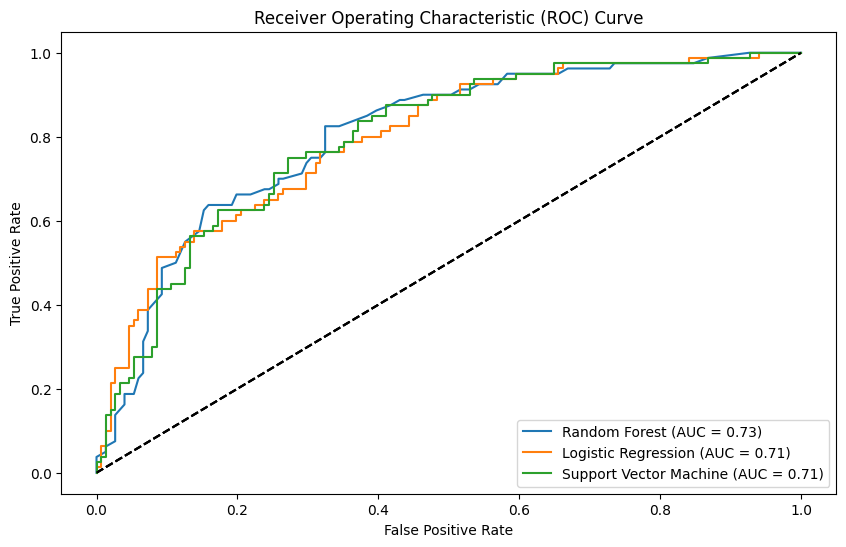

In [30]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming X_train, X_test, y_train, y_test are already defined
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Logistic Regression with increased iterations
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)

# Train Random Forest and SVM models as well (assuming these are already initialized)
rf_model.fit(X_train, y_train)  # Make sure Random Forest is trained
svm_model.fit(X_train_scaled, y_train)  # Scale for SVM

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_logreg = logreg_model.predict(X_test_scaled)
y_pred_svm = svm_model.predict(X_test_scaled)

# Compute ROC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, y_pred_rf)

# Compute ROC for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_model.predict_proba(X_test_scaled)[:, 1])
auc_logreg = roc_auc_score(y_test, y_pred_logreg)

# Compute ROC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.decision_function(X_test_scaled))
auc_svm = roc_auc_score(y_test, y_pred_svm)

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, auc, model_name):
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

# Plot ROC curves
plt.figure(figsize=(10, 6))
plot_roc_curve(fpr_rf, tpr_rf, auc_rf, "Random Forest")
plot_roc_curve(fpr_logreg, tpr_logreg, auc_logreg, "Logistic Regression")
plot_roc_curve(fpr_svm, tpr_svm, auc_svm, "Support Vector Machine")

plt.show()


In [32]:
#Step 8: K-Fold Cross-Validation
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Ensure your data is scaled (especially for SVM and Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)  # Scaling resampled data

# Cross-validation for Random Forest
cv_rf = cross_val_score(rf_model, X_scaled, y_resampled, cv=5, scoring='accuracy')
print("Random Forest CV Scores:", cv_rf)
print("Random Forest Mean CV Score:", cv_rf.mean())

# Cross-validation for Logistic Regression
cv_logreg = cross_val_score(logreg_model, X_scaled, y_resampled, cv=5, scoring='accuracy')
print("Logistic Regression CV Scores:", cv_logreg)
print("Logistic Regression Mean CV Score:", cv_logreg.mean())

# Cross-validation for SVM
cv_svm = cross_val_score(svm_model, X_scaled, y_resampled, cv=5, scoring='accuracy')
print("SVM CV Scores:", cv_svm)
print("SVM Mean CV Score:", cv_svm.mean())


Random Forest CV Scores: [0.79  0.77  0.82  0.915 0.86 ]
Random Forest Mean CV Score: 0.8310000000000001
Logistic Regression CV Scores: [0.745 0.715 0.745 0.795 0.75 ]
Logistic Regression Mean CV Score: 0.75
SVM CV Scores: [0.755 0.72  0.79  0.855 0.795]
SVM Mean CV Score: 0.783
